
# 📊 Stock Price Analysis: Nifty 50 High-Growth Stocks (2020–2025)

## Project Overview
This project analyzes **10 Nifty 50 high-growth stocks** over the period **April 2020 – March 2025**.  
The goal is to demonstrate **data cleaning, analysis, and visualization** skills using **Python (Pandas, Matplotlib/Seaborn)**.  

We calculate key performance metrics such as:
- **CAGR (Compound Annual Growth Rate)**
- **Final value of ₹1L invested**
- **Annualized Volatility**
- **4-Week Moving Average (MA)**

This project highlights how financial data can be processed and turned into actionable insights for recruiters and analysts.



## 🔹 Data Collection & Cleaning
Steps performed:
1. Imported raw stock OHLCV (Open, High, Low, Close, Volume) data.
2. Removed null/missing values.
3. Converted `Volume` column from string to numeric values.
4. Merged multiple stock files into a **single dataset** with a `Ticker` column for stock names.
5. Prepared data for Power BI integration.



## 🔹 Feature Engineering
Added new parameters:
- **Weekly Return %** – percentage change in closing price week to week.
- **4-Week Moving Average (MA)** – smoothed trend line for price.
- **CAGR** – annual growth rate between first and last available price.
- **Final Value if ₹1L invested** – shows absolute growth in Indian market terms.
- **Annualized Volatility** – measures risk.





## 🔹 Exploratory Data Analysis (EDA)
Here we will see step by step how data was cleaned & modified with various indicators for power bi dashboard integration.


In [ ]:
pip install pathlib

In [ ]:
import pandas as pd
import numpy as np
import pathlib as Path

In [ ]:
df = pd.read_excel("/content/10 Stocks historical data(OHLC).xlsx")

In [ ]:
df = pd.read_excel("/content/10 Stocks historical data(OHLC).xlsx", sheet_name="10 stock Historical Data")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   STOCK   2610 non-null   object        
 1   Date    2610 non-null   datetime64[ns]
 2   Open    2610 non-null   float64       
 3   High    2610 non-null   float64       
 4   Low     2610 non-null   float64       
 5   Close   2610 non-null   float64       
 6   Vol.    2610 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 142.9+ KB


In [ ]:
df.describe()

,Date,Open,High,Low,Close
count,2610,2610.000000,2610.000000,2610.000000,2610.000000
mean,2022-10-02 00:00:00.000000256,1079.742245,1123.700670,1036.558372,1084.569310
min,2020-04-05 00:00:00,2.020000,2.200000,2.020000,2.200000
25%,2021-07-04 00:00:00,92.530000,96.875000,89.212500,94.095000
50%,2022-10-02 00:00:00,428.100000,442.490000,410.165000,428.500000
75%,2023-12-31 00:00:00,1043.475000,1088.787500,1007.575000,1044.387500
max,2025-03-30 00:00:00,12238.750000,13298.000000,11800.000000,12160.650000
std,NaN,1880.159926,1955.741107,1796.583686,1885.498428


In [ ]:
df.head(20)

,STOCK,Date,Open,High,Low,Close,Vol.
0,BEL,2020-04-05,24.27,24.33,21.70,23.38,117.15M
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194.20M
2,BEL,2020-04-19,24.10,26.37,23.82,24.85,310.32M
3,BEL,2020-04-26,25.07,25.28,23.78,24.03,116.54M
4,BEL,2020-05-03,23.52,23.57,19.83,19.90,158.76M
5,BEL,2020-05-10,20.17,22.93,19.25,22.58,302.41M
6,BEL,2020-05-17,23.67,23.93,20.50,21.02,337.79M
7,BEL,2020-05-24,21.18,23.48,21.12,23.07,190.95M
8,BEL,2020-05-31,23.33,24.93,22.88,24.65,201.52M
9,BEL,2020-06-07,25.07,25.80,22.47,23.97,183.61M


In [ ]:
# Drop the first row which contains the incorrect header
df = df.iloc[1:].copy()

# Set the column names to the values from the original first row
df.columns = ['STOCK', 'Date', 'Open', 'High', 'Low', 'Close', 'Vol.']

# Rename the 'Vol.' column to 'VOLUME'
df = df.rename(columns={'Vol.': 'VOLUME'})
df = df.rename(columns={'Date': 'DATE'})
df = df.rename(columns={'Open': 'OPEN'})
df = df.rename(columns={'High': 'HIGH'})
df = df.rename(columns={'Low': 'LOW'})
df = df.rename(columns={'Close': 'CLOSE'})
# Display the updated DataFrame to verify the changes
display(df.head())

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194.20M
2,BEL,2020-04-19,24.10,26.37,23.82,24.85,310.32M
3,BEL,2020-04-26,25.07,25.28,23.78,24.03,116.54M
4,BEL,2020-05-03,23.52,23.57,19.83,19.90,158.76M
5,BEL,2020-05-10,20.17,22.93,19.25,22.58,302.41M


In [ ]:
# Calculate weekly return
df['WEEKLY_RETURN'] = df['CLOSE'].pct_change() * 100

# Display the updated DataFrame with the new column
display(df.head())

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURN
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194.20M,NaN
2,BEL,2020-04-19,24.10,26.37,23.82,24.85,310.32M,4.543542
3,BEL,2020-04-26,25.07,25.28,23.78,24.03,116.54M,-3.299799
4,BEL,2020-05-03,23.52,23.57,19.83,19.90,158.76M,-17.186850
5,BEL,2020-05-10,20.17,22.93,19.25,22.58,302.41M,13.467337


In [ ]:
df.tail(20)

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURN
2590,VBL,2024-11-17,593.00,639.60,582.85,616.40,33.36M,7.078954
2591,VBL,2024-11-24,622.00,638.60,595.00,621.20,30.08M,0.778715
2592,VBL,2024-12-01,625.00,645.00,598.80,644.05,40.85M,3.678364
2593,VBL,2024-12-08,644.00,653.00,635.50,645.65,23.92M,0.248428
2594,VBL,2024-12-15,648.95,657.20,609.15,612.55,27.04M,-5.126617
2595,VBL,2024-12-22,621.30,629.90,620.00,624.30,9.44M,1.918211
2596,VBL,2024-12-29,621.15,663.60,621.00,652.20,32.69M,4.469005
2597,VBL,2025-01-05,645.00,645.95,590.40,596.55,20.22M,-8.532659
2598,VBL,2025-01-12,585.00,591.35,545.55,556.35,31.55M,-6.738748
2599,VBL,2025-01-19,557.00,563.00,520.00,541.70,28.62M,-2.633234


In [ ]:
df["WEEKLY_RETURNS_%"] = df.groupby("STOCK")["CLOSE"].pct_change() * 100
display(df.head())

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194.20M,NaN
2,BEL,2020-04-19,24.10,26.37,23.82,24.85,310.32M,4.543542
3,BEL,2020-04-26,25.07,25.28,23.78,24.03,116.54M,-3.299799
4,BEL,2020-05-03,23.52,23.57,19.83,19.90,158.76M,-17.186850
5,BEL,2020-05-10,20.17,22.93,19.25,22.58,302.41M,13.467337


In [ ]:
df["MA_4W"] = df.groupby("STOCK")["CLOSE"].transform(lambda s: s.rolling(4, min_periods=1).mean())
display(df.head())

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194.20M,NaN,23.770000
2,BEL,2020-04-19,24.10,26.37,23.82,24.85,310.32M,4.543542,24.310000
3,BEL,2020-04-26,25.07,25.28,23.78,24.03,116.54M,-3.299799,24.216667
4,BEL,2020-05-03,23.52,23.57,19.83,19.90,158.76M,-17.186850,23.137500
5,BEL,2020-05-10,20.17,22.93,19.25,22.58,302.41M,13.467337,22.840000


# Steps for calculating RSI(Relative Strength Index)
Analyze the provided stock data. Rename the '(vol.)' column to 'VOLUME'. Calculate the weekly percentage return and a 4-week moving average of the 'Close' price, grouped by 'STOCK'. Calculate the 14-week Relative Strength Index (RSI) for each stock. Finally, display the updated DataFrame.

## Calculate weekly price change

* Determine the difference between the current week's closing price and the previous week's closing price for each stock.


* Calculate the weekly price change for each stock and add it as a new column to the DataFrame.



In [ ]:
df['PRICE_CHANGE'] = df.groupby('STOCK')['CLOSE'].diff()
display(df.head())

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,PRICE_CHANGE
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194.20M,NaN,23.770000,NaN
2,BEL,2020-04-19,24.10,26.37,23.82,24.85,310.32M,4.543542,24.310000,1.08
3,BEL,2020-04-26,25.07,25.28,23.78,24.03,116.54M,-3.299799,24.216667,-0.82
4,BEL,2020-05-03,23.52,23.57,19.83,19.90,158.76M,-17.186850,23.137500,-4.13
5,BEL,2020-05-10,20.17,22.93,19.25,22.58,302.41M,13.467337,22.840000,2.68


## Separate gains and losses

* Create two new columns, one for positive price changes (gains) and one for negative price changes (losses).


In [ ]:
df['GAIN'] = np.where(df['PRICE_CHANGE'] > 0, df['PRICE_CHANGE'], 0)
df['LOSS'] = np.where(df['PRICE_CHANGE'] < 0, abs(df['PRICE_CHANGE']), 0)
display(df.head())

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,PRICE_CHANGE,GAIN,LOSS
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194.20M,NaN,23.770000,NaN,0.00,0.00
2,BEL,2020-04-19,24.10,26.37,23.82,24.85,310.32M,4.543542,24.310000,1.08,1.08,0.00
3,BEL,2020-04-26,25.07,25.28,23.78,24.03,116.54M,-3.299799,24.216667,-0.82,0.00,0.82
4,BEL,2020-05-03,23.52,23.57,19.83,19.90,158.76M,-17.186850,23.137500,-4.13,0.00,4.13
5,BEL,2020-05-10,20.17,22.93,19.25,22.58,302.41M,13.467337,22.840000,2.68,2.68,0.00


## Calculate average gains and losses

* Calculate the simple moving average of gains and losses over a 14-week period for each stock.


In [ ]:
df['AVG_GAIN'] = df.groupby('STOCK')['GAIN'].transform(lambda s: s.rolling(14, min_periods=1).mean())
df['AVG_LOSS'] = df.groupby('STOCK')['LOSS'].transform(lambda s: s.rolling(14, min_periods=1).mean())
display(df.head())

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,PRICE_CHANGE,GAIN,LOSS,AVG_GAIN,AVG_LOSS
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194.20M,NaN,23.770000,NaN,0.00,0.00,0.000,0.000000
2,BEL,2020-04-19,24.10,26.37,23.82,24.85,310.32M,4.543542,24.310000,1.08,1.08,0.00,0.540,0.000000
3,BEL,2020-04-26,25.07,25.28,23.78,24.03,116.54M,-3.299799,24.216667,-0.82,0.00,0.82,0.360,0.273333
4,BEL,2020-05-03,23.52,23.57,19.83,19.90,158.76M,-17.186850,23.137500,-4.13,0.00,4.13,0.270,1.237500
5,BEL,2020-05-10,20.17,22.93,19.25,22.58,302.41M,13.467337,22.840000,2.68,2.68,0.00,0.752,0.990000


## Calculate relative strength (rs)

* Compute the ratio of the average gain to the average loss.


* Divide the 'AVG_GAIN' column by the 'AVG_LOSS' column to calculate the Relative Strength (RS) and store it in a new column named 'RS', then display the head of the DataFrame.



In [ ]:
df['RS'] = df['AVG_GAIN'] / df['AVG_LOSS']
display(df.head())

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,PRICE_CHANGE,GAIN,LOSS,AVG_GAIN,AVG_LOSS,RS
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194.20M,NaN,23.770000,NaN,0.00,0.00,0.000,0.000000,NaN
2,BEL,2020-04-19,24.10,26.37,23.82,24.85,310.32M,4.543542,24.310000,1.08,1.08,0.00,0.540,0.000000,inf
3,BEL,2020-04-26,25.07,25.28,23.78,24.03,116.54M,-3.299799,24.216667,-0.82,0.00,0.82,0.360,0.273333,1.317073
4,BEL,2020-05-03,23.52,23.57,19.83,19.90,158.76M,-17.186850,23.137500,-4.13,0.00,4.13,0.270,1.237500,0.218182
5,BEL,2020-05-10,20.17,22.93,19.25,22.58,302.41M,13.467337,22.840000,2.68,2.68,0.00,0.752,0.990000,0.759596


## Calculate relative strength index (rsi)

* Apply the RSI formula using the calculated RS.


In [ ]:
df['RSI'] = 100 - (100 / (1 + df['RS']))
display(df.head())

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,PRICE_CHANGE,GAIN,LOSS,AVG_GAIN,AVG_LOSS,RS,RSI
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194.20M,NaN,23.770000,NaN,0.00,0.00,0.000,0.000000,NaN,NaN
2,BEL,2020-04-19,24.10,26.37,23.82,24.85,310.32M,4.543542,24.310000,1.08,1.08,0.00,0.540,0.000000,inf,100.000000
3,BEL,2020-04-26,25.07,25.28,23.78,24.03,116.54M,-3.299799,24.216667,-0.82,0.00,0.82,0.360,0.273333,1.317073,56.842105
4,BEL,2020-05-03,23.52,23.57,19.83,19.90,158.76M,-17.186850,23.137500,-4.13,0.00,4.13,0.270,1.237500,0.218182,17.910448
5,BEL,2020-05-10,20.17,22.93,19.25,22.58,302.41M,13.467337,22.840000,2.68,2.68,0.00,0.752,0.990000,0.759596,43.168772


## Clean up intermediate columns

* Remove the temporary columns created during the calculation process to keep the DataFrame clean.


In [ ]:
df = df.drop(columns=['PRICE_CHANGE', 'GAIN', 'LOSS', 'AVG_GAIN', 'AVG_LOSS'], errors='ignore')
display(df.head())

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,RS,RSI
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194.20M,NaN,23.770000,NaN,NaN
2,BEL,2020-04-19,24.10,26.37,23.82,24.85,310.32M,4.543542,24.310000,inf,100.000000
3,BEL,2020-04-26,25.07,25.28,23.78,24.03,116.54M,-3.299799,24.216667,1.317073,56.842105
4,BEL,2020-05-03,23.52,23.57,19.83,19.90,158.76M,-17.186850,23.137500,0.218182,17.910448
5,BEL,2020-05-10,20.17,22.93,19.25,22.58,302.41M,13.467337,22.840000,0.759596,43.168772


## Display results

* Display the entire DataFrame to show the final result including the calculated RSI values and after cleaning up intermediate columns.


In [ ]:
display(df)

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,RS,RSI
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194.20M,NaN,23.770000,NaN,NaN
2,BEL,2020-04-19,24.10,26.37,23.82,24.85,310.32M,4.543542,24.310000,inf,100.000000
3,BEL,2020-04-26,25.07,25.28,23.78,24.03,116.54M,-3.299799,24.216667,1.317073,56.842105
4,BEL,2020-05-03,23.52,23.57,19.83,19.90,158.76M,-17.186850,23.137500,0.218182,17.910448
5,BEL,2020-05-10,20.17,22.93,19.25,22.58,302.41M,13.467337,22.840000,0.759596,43.168772
...,...,...,...,...,...,...,...,...,...,...,...
2605,VBL,2025-03-02,436.00,494.95,419.55,487.75,80.71M,11.856438,472.500000,0.498685,33.274846
2606,VBL,2025-03-09,487.80,497.50,470.50,488.15,34.65M,0.082009,472.400000,0.414350,29.296149
2607,VBL,2025-03-16,492.60,558.60,491.55,537.95,56.16M,10.201782,487.475000,0.595417,37.320462
2608,VBL,2025-03-23,545.00,547.75,511.65,539.65,31.46M,0.316014,513.375000,0.687259,40.732265


###  Key Findings

*   The column '(vol.)' was successfully renamed to 'VOLUME'.
*   Weekly percentage returns were calculated and added as a new column 'WEEKLY\_RETURNS\_\%'.
*   A 4-week moving average of the 'Close' price was calculated for each stock and added as 'MA\_4W'.
*   The 14-week Relative Strength Index (RSI) was calculated for each stock and added as the 'RSI' column.
*   Intermediate columns used for RSI calculation ('PRICE\_CHANGE', 'GAIN', 'LOSS', 'AVG\_GAIN', 'AVG\_LOSS') were removed from the DataFrame.

### Replacing infinty and NaN values in RSI Coulmn



In [ ]:
# Replace infinity values in 'RSI' with 100
df['RSI'] = df['RSI'].replace([np.inf, -np.inf], 100)

# Replace NaN values in 'RSI' with 50
df['RSI'] = df['RSI'].fillna(50)

# Display the updated DataFrame to verify the changes
display(df.head())
display(df.tail())

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,RS,RSI
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194.20M,NaN,23.770000,NaN,50.000000
2,BEL,2020-04-19,24.10,26.37,23.82,24.85,310.32M,4.543542,24.310000,inf,100.000000
3,BEL,2020-04-26,25.07,25.28,23.78,24.03,116.54M,-3.299799,24.216667,1.317073,56.842105
4,BEL,2020-05-03,23.52,23.57,19.83,19.90,158.76M,-17.186850,23.137500,0.218182,17.910448
5,BEL,2020-05-10,20.17,22.93,19.25,22.58,302.41M,13.467337,22.840000,0.759596,43.168772


,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,RS,RSI
2605,VBL,2025-03-02,436.0,494.95,419.55,487.75,80.71M,11.856438,472.500,0.498685,33.274846
2606,VBL,2025-03-09,487.8,497.50,470.50,488.15,34.65M,0.082009,472.400,0.414350,29.296149
2607,VBL,2025-03-16,492.6,558.60,491.55,537.95,56.16M,10.201782,487.475,0.595417,37.320462
2608,VBL,2025-03-23,545.0,547.75,511.65,539.65,31.46M,0.316014,513.375,0.687259,40.732265
2609,VBL,2025-03-30,550.0,552.50,529.15,535.45,16.62M,-0.778282,525.300,0.625579,38.483474


In [ ]:
df = df.drop(columns=['RS'], errors='ignore')
display(df.head())
display(df.tail())

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,RSI
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194.20M,NaN,23.770000,50.000000
2,BEL,2020-04-19,24.10,26.37,23.82,24.85,310.32M,4.543542,24.310000,100.000000
3,BEL,2020-04-26,25.07,25.28,23.78,24.03,116.54M,-3.299799,24.216667,56.842105
4,BEL,2020-05-03,23.52,23.57,19.83,19.90,158.76M,-17.186850,23.137500,17.910448
5,BEL,2020-05-10,20.17,22.93,19.25,22.58,302.41M,13.467337,22.840000,43.168772


,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,RSI
2605,VBL,2025-03-02,436.0,494.95,419.55,487.75,80.71M,11.856438,472.500,33.274846
2606,VBL,2025-03-09,487.8,497.50,470.50,488.15,34.65M,0.082009,472.400,29.296149
2607,VBL,2025-03-16,492.6,558.60,491.55,537.95,56.16M,10.201782,487.475,37.320462
2608,VBL,2025-03-23,545.0,547.75,511.65,539.65,31.46M,0.316014,513.375,40.732265
2609,VBL,2025-03-30,550.0,552.50,529.15,535.45,16.62M,-0.778282,525.300,38.483474


## Checking and Replacing NaN values in 'Weekly Returns %' Column

In [ ]:
# Check for NaN values in the 'WEEKLY_RETURNS_%' column and count them
nan_count_weekly_returns = df['WEEKLY_RETURNS_%'].isnull().sum()

# Display the count of NaN values
print(f"Number of NaN values in the 'WEEKLY_RETURNS_%' column: {nan_count_weekly_returns}")

Number of NaN values in the 'WEEKLY_RETURNS_%' column: 10


In [ ]:
# Display rows where 'WEEKLY_RETURNS_%' is NaN
display(df[df['WEEKLY_RETURNS_%'].isnull()])

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,RSI
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194.20M,NaN,23.77,50.0
261,BHEL,2020-04-05,21.05,22.65,20.85,22.35,75.30M,NaN,22.35,50.0
522,HAL,2020-04-05,274.77,311.00,262.50,274.13,526.41K,NaN,274.13,50.0
783,JINDALSTEEL,2020-04-05,67.00,97.50,66.50,91.60,160.61M,NaN,91.60,50.0
1044,KPIT,2020-04-05,39.70,43.70,38.00,42.80,690.72K,NaN,42.80,50.0
1305,SOLAR INDUSTRIES,2020-04-05,928.00,931.95,895.45,915.10,57.10K,NaN,915.10,50.0
1566,SUZLON,2020-04-05,2.02,2.20,2.02,2.20,6.67M,NaN,2.20,50.0
1827,TATA MOTORS,2020-04-05,68.34,76.01,65.20,74.37,236.93M,NaN,74.37,50.0
2088,TRENT,2020-04-05,472.00,496.50,451.15,464.60,2.09M,NaN,464.60,50.0
2349,VBL,2020-04-05,49.76,52.44,46.67,51.38,8.66M,NaN,51.38,50.0


In [ ]:
# Fill NaN values in the 'WEEKLY_RETURNS_%' column with 0
df['WEEKLY_RETURNS_%'] = df['WEEKLY_RETURNS_%'].fillna(0)

# Display the rows where 'WEEKLY_RETURNS_%' was previously NaN to verify the change
display(df[df['WEEKLY_RETURNS_%'] == 0].head(10))

# Check the count of NaN values again to confirm they are gone
nan_count_weekly_return = df['WEEKLY_RETURNS_%'].isnull().sum()
print(f"Number of NaN values in the 'WEEKLY_RETURNS_%' column after filling: {nan_count_weekly_return}")

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,RSI
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194.20M,0.0,23.770,50.000000
261,BHEL,2020-04-05,21.05,22.65,20.85,22.35,75.30M,0.0,22.350,50.000000
292,BHEL,2020-11-08,27.65,29.25,27.40,27.95,168.84M,0.0,28.250,34.728033
522,HAL,2020-04-05,274.77,311.00,262.50,274.13,526.41K,0.0,274.130,50.000000
783,JINDALSTEEL,2020-04-05,67.00,97.50,66.50,91.60,160.61M,0.0,91.600,50.000000
1044,KPIT,2020-04-05,39.70,43.70,38.00,42.80,690.72K,0.0,42.800,50.000000
1305,SOLAR INDUSTRIES,2020-04-05,928.00,931.95,895.45,915.10,57.10K,0.0,915.100,50.000000
1566,SUZLON,2020-04-05,2.02,2.20,2.02,2.20,6.67M,0.0,2.200,50.000000
1598,SUZLON,2020-11-15,3.31,3.49,3.12,3.17,55.27M,0.0,3.100,41.214058
1599,SUZLON,2020-11-22,3.17,3.26,3.03,3.17,37.67M,0.0,3.055,42.434211


Number of NaN values in the 'WEEKLY_RETURNS_%' column after filling: 0


In [ ]:
display(df.head())
display(df.tail())

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,RSI
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194.20M,0.000000,23.770000,50.000000
2,BEL,2020-04-19,24.10,26.37,23.82,24.85,310.32M,4.543542,24.310000,100.000000
3,BEL,2020-04-26,25.07,25.28,23.78,24.03,116.54M,-3.299799,24.216667,56.842105
4,BEL,2020-05-03,23.52,23.57,19.83,19.90,158.76M,-17.186850,23.137500,17.910448
5,BEL,2020-05-10,20.17,22.93,19.25,22.58,302.41M,13.467337,22.840000,43.168772


,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,RSI
2605,VBL,2025-03-02,436.0,494.95,419.55,487.75,80.71M,11.856438,472.500,33.274846
2606,VBL,2025-03-09,487.8,497.50,470.50,488.15,34.65M,0.082009,472.400,29.296149
2607,VBL,2025-03-16,492.6,558.60,491.55,537.95,56.16M,10.201782,487.475,37.320462
2608,VBL,2025-03-23,545.0,547.75,511.65,539.65,31.46M,0.316014,513.375,40.732265
2609,VBL,2025-03-30,550.0,552.50,529.15,535.45,16.62M,-0.778282,525.300,38.483474


In [ ]:
# Check for NaN values in the 'MA_4W' column and count them
nan_count_ma_4w = df['MA_4W'].isnull().sum()

# Display the count of NaN values
print(f"Number of NaN values in the 'MA_4W' column: {nan_count_ma_4w}")

Number of NaN values in the 'MA_4W' column: 0


In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('processed_stock_data.csv', index=False)

print("DataFrame saved to processed_stock_data.csv")

DataFrame saved to processed_stock_data.csv


## Converting suffixes(srtings) in Volume Column to Numeric Values

In [ ]:
def clean_volume(volume):
    """Converts volume string with M, B, or K suffix to numeric."""
    if isinstance(volume, str):
        volume = volume.strip()
        if volume.endswith('M'):
            return float(volume[:-1]) * 1_000_000
        elif volume.endswith('B'):
            return float(volume[:-1]) * 1_000_000_000
        elif volume.endswith('K'):
            return float(volume[:-1]) * 1_000
    # Handle cases where volume might be a number already or has no suffix
    try:
        return float(volume)
    except ValueError:
        return None # Or np.nan, depending on how you want to handle unparseable values


df['VOLUME'] = df['VOLUME'].apply(clean_volume)

# Display the updated DataFrame to verify the changes
display(df.head())
display(df.tail())

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,RSI
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194200000.0,0.000000,23.770000,50.000000
2,BEL,2020-04-19,24.10,26.37,23.82,24.85,310320000.0,4.543542,24.310000,100.000000
3,BEL,2020-04-26,25.07,25.28,23.78,24.03,116540000.0,-3.299799,24.216667,56.842105
4,BEL,2020-05-03,23.52,23.57,19.83,19.90,158760000.0,-17.186850,23.137500,17.910448
5,BEL,2020-05-10,20.17,22.93,19.25,22.58,302410000.0,13.467337,22.840000,43.168772


,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,RSI
2605,VBL,2025-03-02,436.0,494.95,419.55,487.75,80710000.0,11.856438,472.500,33.274846
2606,VBL,2025-03-09,487.8,497.50,470.50,488.15,34650000.0,0.082009,472.400,29.296149
2607,VBL,2025-03-16,492.6,558.60,491.55,537.95,56160000.0,10.201782,487.475,37.320462
2608,VBL,2025-03-23,545.0,547.75,511.65,539.65,31460000.0,0.316014,513.375,40.732265
2609,VBL,2025-03-30,550.0,552.50,529.15,535.45,16620000.0,-0.778282,525.300,38.483474


In [ ]:
# Save the DataFrame to a CSV file, overwriting the previous version
df.to_csv('processed_stock_data.csv', index=False)

print("DataFrame saved to processed_stock_data.csv")

DataFrame saved to processed_stock_data.csv


In [ ]:
# Check the data type of the 'DATE' column
print(df['DATE'].dtype)

datetime64[ns]


In [ ]:
# Convert the 'DATE' column to datetime objects
df['DATE'] = pd.to_datetime(df['DATE'])

# Display the data type to confirm the conversion
print(df['DATE'].dtype)

# Display the head of the DataFrame to see the formatted dates
display(df.head())

datetime64[ns]


,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,RSI
1,BEL,2020-04-12,24.33,24.50,22.97,23.77,194200000.0,0.000000,23.770000,50.000000
2,BEL,2020-04-19,24.10,26.37,23.82,24.85,310320000.0,4.543542,24.310000,100.000000
3,BEL,2020-04-26,25.07,25.28,23.78,24.03,116540000.0,-3.299799,24.216667,56.842105
4,BEL,2020-05-03,23.52,23.57,19.83,19.90,158760000.0,-17.186850,23.137500,17.910448
5,BEL,2020-05-10,20.17,22.93,19.25,22.58,302410000.0,13.467337,22.840000,43.168772


In [ ]:
df.to_csv('processed_stock_data.csv', index=False)

print("DataFrame saved to processed_stock_data.csv")

DataFrame saved to processed_stock_data.csv


# Steps to calculate CAGR
Analyze the provided stock data to calculate and visualize the 5-year Compound Annual Growth Rate (CAGR) for each of the 10 stocks, focusing on the period from April 2020 to April 2025.

## Filter data by date

* Filter the DataFrame to include only the data within the 5-year period of interest (April 2020 to April 2025).

In [ ]:
# Define the start and end dates for the 5-year period
start_date = pd.to_datetime('2020-04-01')
end_date = pd.to_datetime('2025-04-30')

# Filter the DataFrame to include only data within the defined period
df_filtered = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)].copy()

# Display the head and tail of the filtered DataFrame
display(df_filtered.head())
display(df_filtered.tail())

,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,RSI
0,BEL,2020-04-12,24.33,24.50,22.97,23.77,194200000.0,0.000000,23.770000,50.000000
1,BEL,2020-04-19,24.10,26.37,23.82,24.85,310320000.0,4.543542,24.310000,100.000000
2,BEL,2020-04-26,25.07,25.28,23.78,24.03,116540000.0,-3.299799,24.216667,56.842105
3,BEL,2020-05-03,23.52,23.57,19.83,19.90,158760000.0,-17.186850,23.137500,17.910448
4,BEL,2020-05-10,20.17,22.93,19.25,22.58,302410000.0,13.467337,22.840000,43.168772


,STOCK,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,WEEKLY_RETURNS_%,MA_4W,RSI
2604,VBL,2025-03-02,436.0,494.95,419.55,487.75,80710000.0,11.856438,472.500,33.274846
2605,VBL,2025-03-09,487.8,497.50,470.50,488.15,34650000.0,0.082009,472.400,29.296149
2606,VBL,2025-03-16,492.6,558.60,491.55,537.95,56160000.0,10.201782,487.475,37.320462
2607,VBL,2025-03-23,545.0,547.75,511.65,539.65,31460000.0,0.316014,513.375,40.732265
2608,VBL,2025-03-30,550.0,552.50,529.15,535.45,16620000.0,-0.778282,525.300,38.483474


## Get Start and End Prices

### Subtask:
Group the filtered data by stock and find the first and last closing price for each stock to represent the start and end prices for CAGR calculation.(Apr 2020 to Apr 2025)

In [ ]:
# Sort the filtered DataFrame by STOCK and DATE to ensure correct order
df_filtered = df_filtered.sort_values(by=['STOCK', 'DATE'])

# Get the first closing price for each stock (start price)
start_prices = df_filtered.groupby('STOCK').first()['CLOSE'].rename('Start_Price')

# Get the last closing price for each stock (end price)
end_prices = df_filtered.groupby('STOCK').last()['CLOSE'].rename('End_Price')

# Combine the start and end prices into a new DataFrame
cagr_df = pd.concat([start_prices, end_prices], axis=1)

# Display the DataFrame with start and end prices
display(cagr_df)

,Start_Price,End_Price
STOCK,,
BEL,23.77,280.00
BHEL,22.35,214.45
HAL,274.13,4239.10
JINDALSTEEL,91.60,850.10
KPIT,42.80,1134.00
SOLAR INDUSTRIES,915.10,10987.10
SUZLON,2.20,55.36
TATA MOTORS,74.37,613.85
TRENT,464.60,5562.85


## Calculate CAGR

* Calculate the Compound Annual Growth Rate (CAGR) for each stock using the formula: `((Ending Value / Beginning Value)^(1 / Number of Years)) - 1`.

* Apply the CAGR formula to the DataFrame containing start and end prices and store the result in a new column named 'CAGR'.

In [ ]:
# Define the number of years
number_of_years = 5

# Calculate CAGR for each stock and multiply by 100 to get percentage
cagr_df['CAGR'] = (((cagr_df['End_Price'] / cagr_df['Start_Price']) ** (1 / number_of_years)) - 1) * 100

# Display the DataFrame with the calculated CAGR
display(cagr_df)

,Start_Price,End_Price,CAGR
STOCK,,,
BEL,23.77,280.00,63.766765
BHEL,22.35,214.45,57.184495
HAL,274.13,4239.10,72.927244
JINDALSTEEL,91.60,850.10,56.140264
KPIT,42.80,1134.00,92.590055
SOLAR INDUSTRIES,915.10,10987.10,64.392842
SUZLON,2.20,55.36,90.613950
TATA MOTORS,74.37,613.85,52.522142
TRENT,464.60,5562.85,64.302295


## Visualize CAGR

Create a bar or line chart to display the calculated CAGR for each of the 10 stocks.

/tmp/ipython-input-1395502401.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cagr_df_sorted.index, y='CAGR', data=cagr_df_sorted, palette='viridis')


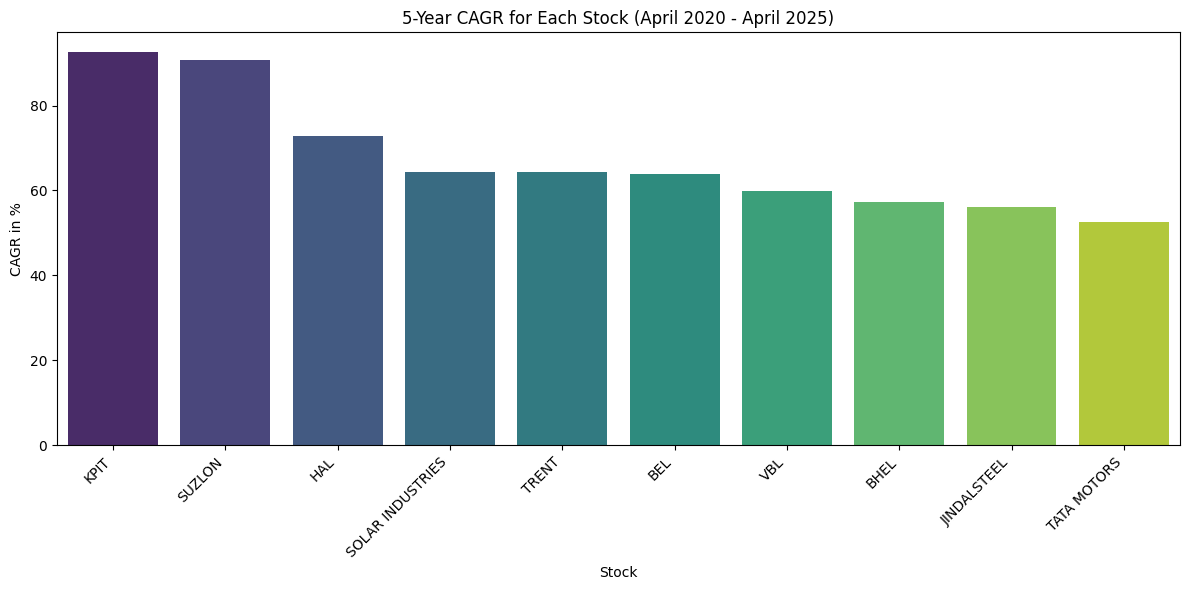

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by CAGR for better visualization
cagr_df_sorted = cagr_df.sort_values('CAGR', ascending=False)

# Create a bar chart of CAGR
plt.figure(figsize=(12, 6))
sns.barplot(x=cagr_df_sorted.index, y='CAGR', data=cagr_df_sorted, palette='viridis')
plt.title('5-Year CAGR for Each Stock (April 2020 - April 2025)')
plt.xlabel('Stock')
plt.ylabel('CAGR in %')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Visualize Normalized Stock Price Growth Over Time

*  Create a line chart to show how normalized cloing price over the period of 5 years looks for the 10 stocks

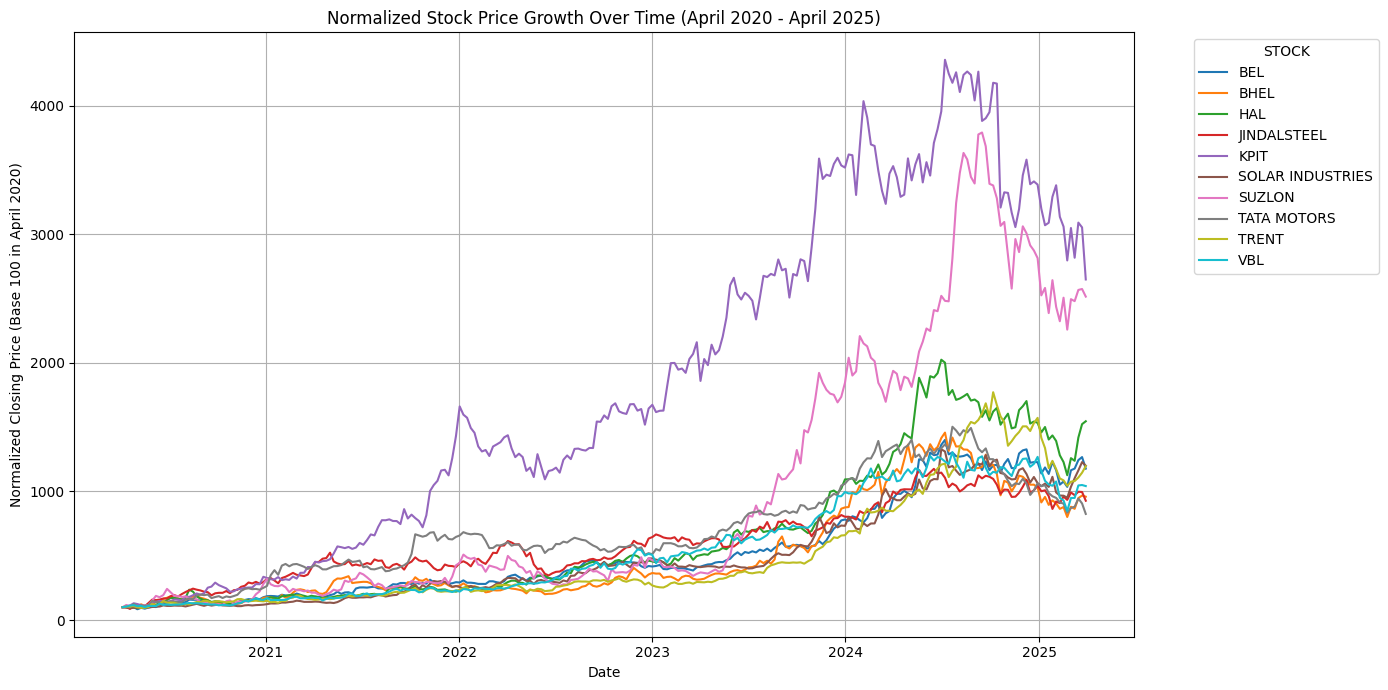

In [ ]:
# Calculate normalized closing price for each stock
df['Normalized_CLOSE'] = df.groupby('STOCK')['CLOSE'].transform(lambda x: x / x.iloc[0] * 100)

# Create a line chart of normalized closing price over time for all stocks
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='DATE', y='Normalized_CLOSE', hue='STOCK')
plt.title('Normalized Stock Price Growth Over Time (April 2020 - April 2025)')
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price (Base 100 in April 2020)')
plt.grid(True)
plt.legend(title='STOCK', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Final Investment if ₹ 1 Lakh Invested.

*  Create a bar chart to show how much final invested amount would be over 5 years if initially only ₹ 1 Lakh was invested.
*  This shows how good selected stocks can give higher returns over a certain period of time.

,Start_Price,End_Price,CAGR,Final_Investment_Value,Final_Investment_Value_Lakhs
STOCK,,,,,
BEL,23.77,280.00,63.766765,1.177955e+06,11.779554
BHEL,22.35,214.45,57.184495,9.595078e+05,9.595078
HAL,274.13,4239.10,72.927244,1.546383e+06,15.463831
JINDALSTEEL,91.60,850.10,56.140264,9.280568e+05,9.280568
KPIT,42.80,1134.00,92.590055,2.649533e+06,26.495327
SOLAR INDUSTRIES,915.10,10987.10,64.392842,1.200645e+06,12.006447
SUZLON,2.20,55.36,90.613950,2.516364e+06,25.163636
TATA MOTORS,74.37,613.85,52.522142,8.254000e+05,8.254000
TRENT,464.60,5562.85,64.302295,1.197342e+06,11.973418


/tmp/ipython-input-2236650049.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cagr_df.sort_values('Final_Investment_Value_Lakhs', ascending=False).index, y='Final_Investment_Value_Lakhs', data=cagr_df.sort_values('Final_Investment_Value_Lakhs', ascending=False), palette='viridis')


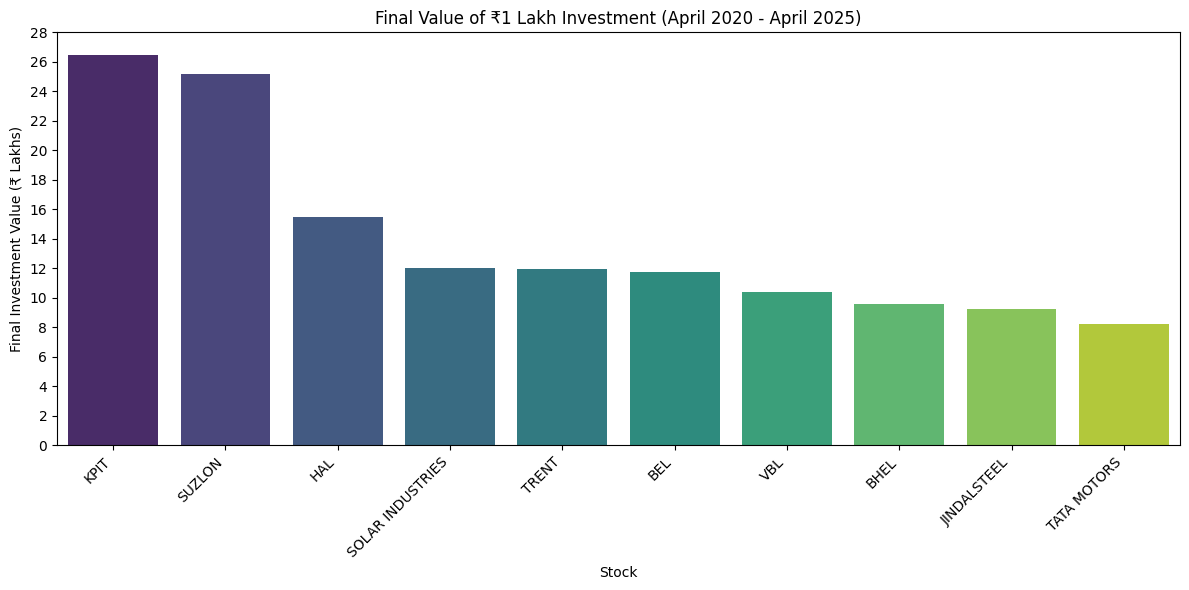

In [ ]:
# Define the initial investment amount
initial_investment = 100000

# Calculate the final value of the investment for each stock
cagr_df['Final_Investment_Value'] = (cagr_df['End_Price'] / cagr_df['Start_Price']) * initial_investment

# Convert the final investment value to lakhs
cagr_df['Final_Investment_Value_Lakhs'] = cagr_df['Final_Investment_Value'] / 100000

# Display the DataFrame with the calculated final investment values in lakhs
display(cagr_df)

# Create a bar chart to visualize the final investment values in lakhs
plt.figure(figsize=(12, 6))
sns.barplot(x=cagr_df.sort_values('Final_Investment_Value_Lakhs', ascending=False).index, y='Final_Investment_Value_Lakhs', data=cagr_df.sort_values('Final_Investment_Value_Lakhs', ascending=False), palette='viridis')
plt.title('Final Value of ₹1 Lakh Investment (April 2020 - April 2025)')
plt.xlabel('Stock')
plt.ylabel('Final Investment Value (₹ Lakhs)')
plt.xticks(rotation=45, ha='right')

# Set y-axis ticks at intervals of 2 lakhs
max_value = int(cagr_df['Final_Investment_Value_Lakhs'].max())
plt.yticks(range(0, max_value + 3, 2))

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The initial data loaded from the Excel file had an incorrect header, requiring the first row to be used as column names and subsequent rows as data.
*   The initial data types were uniformly 'object', necessitating conversion of 'DATE' to datetime and 'VOLUME' to numeric after cleaning suffixes like 'M', 'B', and 'K'.
*   Calculated technical indicators like 'WEEKLY\_RETURNS\_%' and 'RSI' introduced missing (NaN) and infinite (inf) values, which were handled by filling NaNs with 0 (for returns) and 50 (for RSI), and infinities with 100 (for RSI).
*   Filtering the data for the period April 2020 to April 2025 allowed for the calculation of the 5-year CAGR for each stock.
*   KPIT and SUZLON showed the highest 5-year CAGRs, while Tata Motors had the lowest among the analyzed stocks.
*   A ₹1 Lakh investment at the start of the period would have grown to over ₹26 Lakhs in KPIT and over ₹25 Lakhs in SUZLON, highlighting their significant absolute growth.
*   Normalized stock price growth visualization confirmed the superior relative performance of KPIT and SUZLON over the 5-year period.
*   The RSI vs. Weekly Returns scatter plot showed a general correlation between higher positive returns and higher RSI values, and vice versa.

### Insights or Next Steps

*   The analysis successfully identified stocks with high CAGR (>50%), meeting the project's primary objective. KPIT and SUZLON were the standout performers.
*   Future work could involve integrating fundamental analysis and risk metrics to provide a more comprehensive investment assessment beyond historical price performance.



## 🔹 Key Insights
- Most of the selected stocks grew by **>50% CAGR** over 5 years.
- ₹1L invested in some stocks (e.g., BEL, BSE) grew to **10L+**, showing high compounding.
- Moving Averages help identify smoother long-term trends.
- Volatility varied by stock, highlighting different risk levels.

This demonstrates how investors could assess **risk-return trade-offs** in Nifty 50 stocks.


## Stock Price Analysis Dashboard Sample(KPIT)


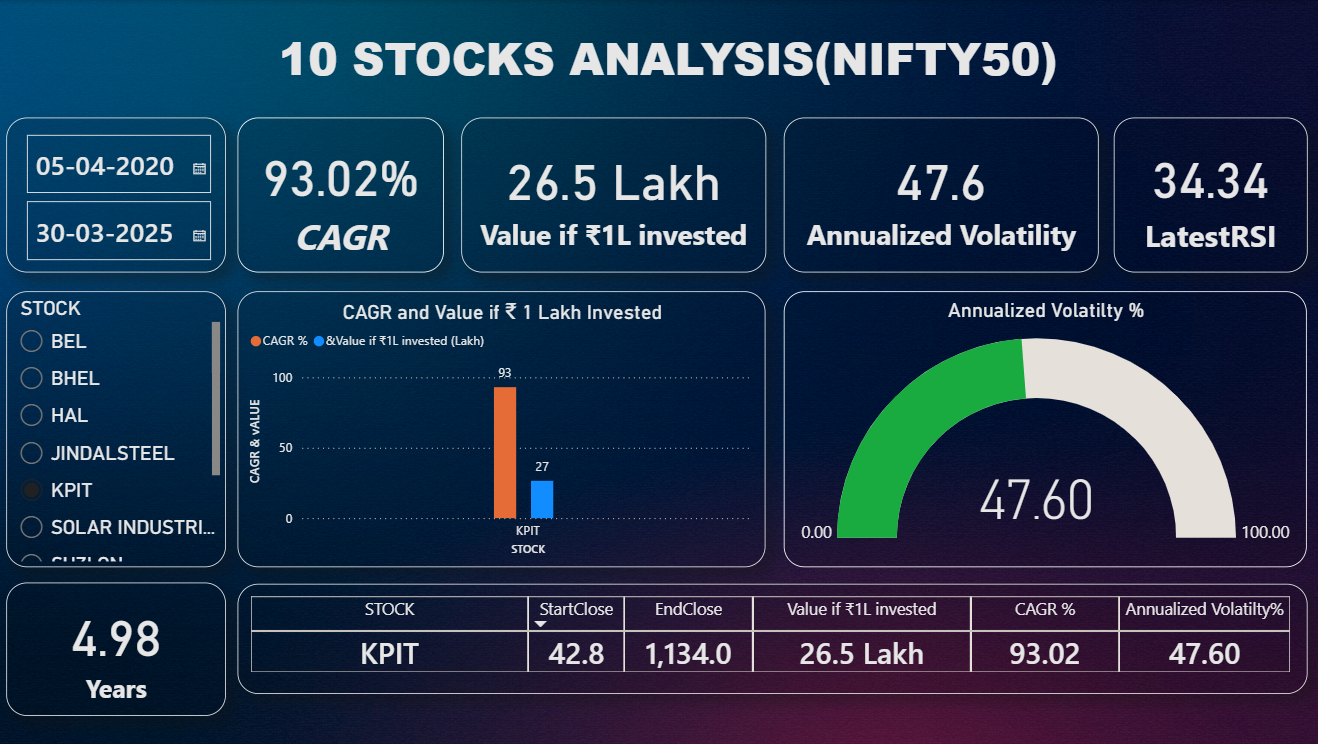




## ✅ Conclusion
This project showcases:
- **Data Cleaning (Pandas)** → handling missing values, merging datasets.  
- **Feature Engineering** → calculating CAGR, Volatility, Returns, Moving Averages.  
- **Visualization (Matplotlib/Seaborn)** → professional charts for trend analysis.  
- **Business Relevance** → interpreting results in terms of ₹1L invested, CAGR %, and volatility.  
- **Dashboard Integration** → Visualizing data in Power Bi for easier understanding.

